In [51]:
import pandas as pd
import numpy as np
from pathlib import Path  
import seaborn as sns
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [8]:
current_directory = Path().resolve()

data_directory = current_directory.parent / 'data'
file_path = data_directory / "weather_classification_data.csv"
try:
    df = pd.read_csv(file_path)

except:
    print(f"File path : {file_path} doesn't exists")

In [11]:
print("columns in a dataset: \n", df.columns)
print("Info of a dataset:", df.info())

columns in a dataset: 
 Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null

In [13]:
# checking null values
print("Checking the null values")
df.isna().sum()

Checking the null values


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [15]:
# checking the Duplicates
print("Duplicates in the data")
df.duplicated().sum()

Duplicates in the data


np.int64(0)

In [16]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if feature not in numerical_features]
print(numerical_features)
print(categorical_features)

['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
['Cloud Cover', 'Season', 'Location', 'Weather Type']


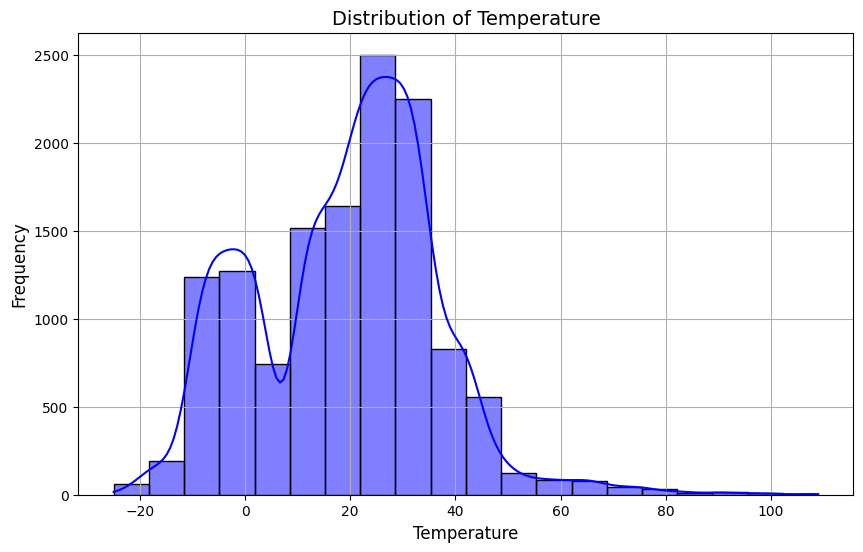

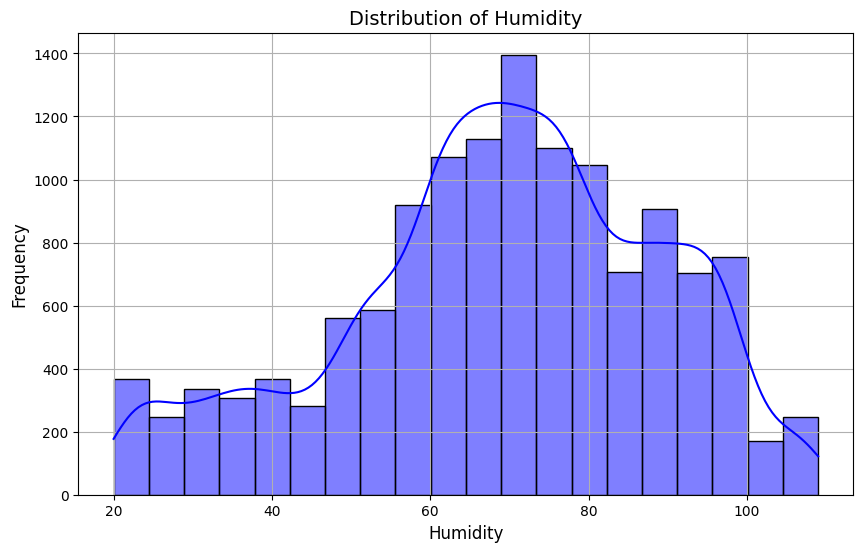

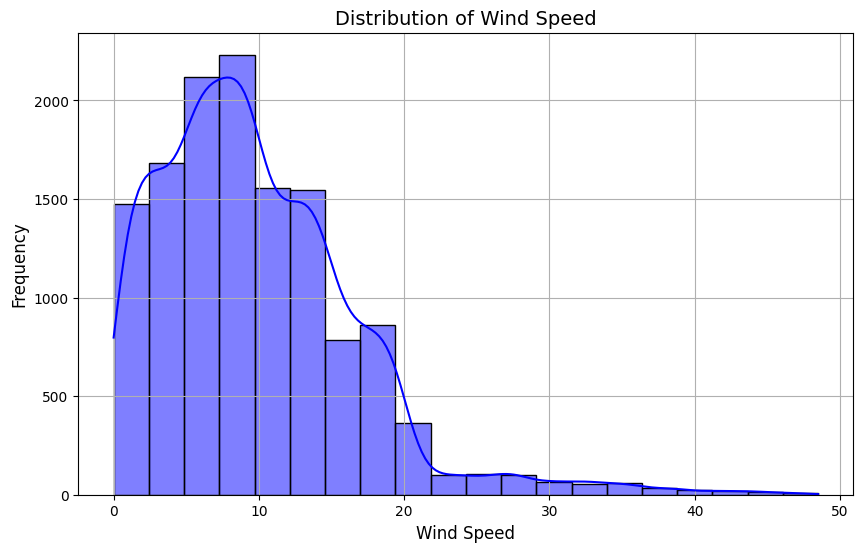

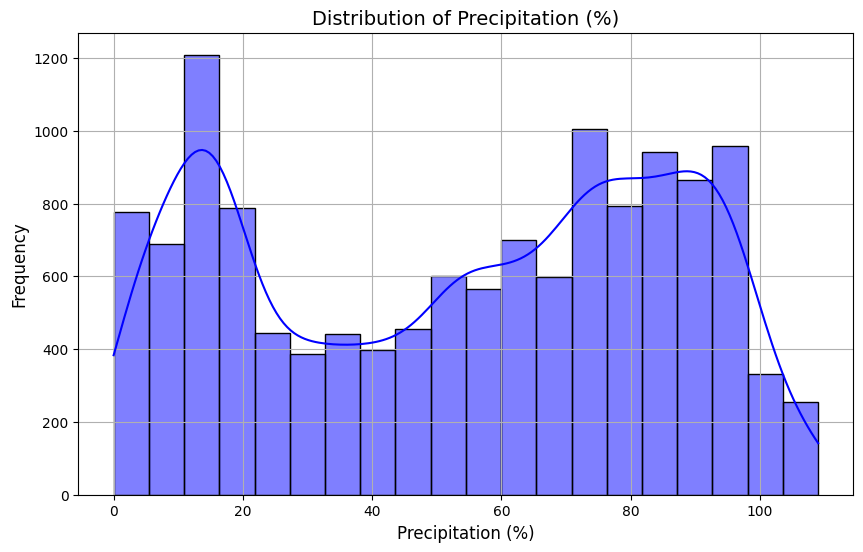

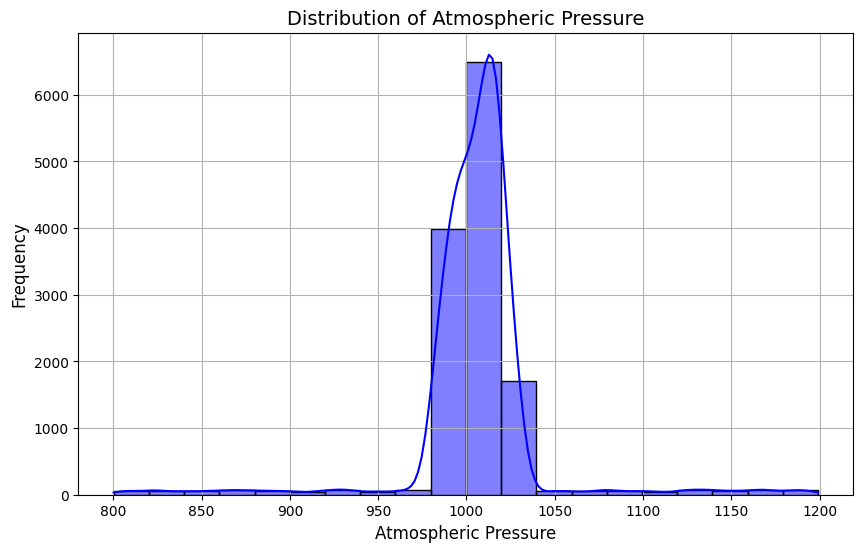

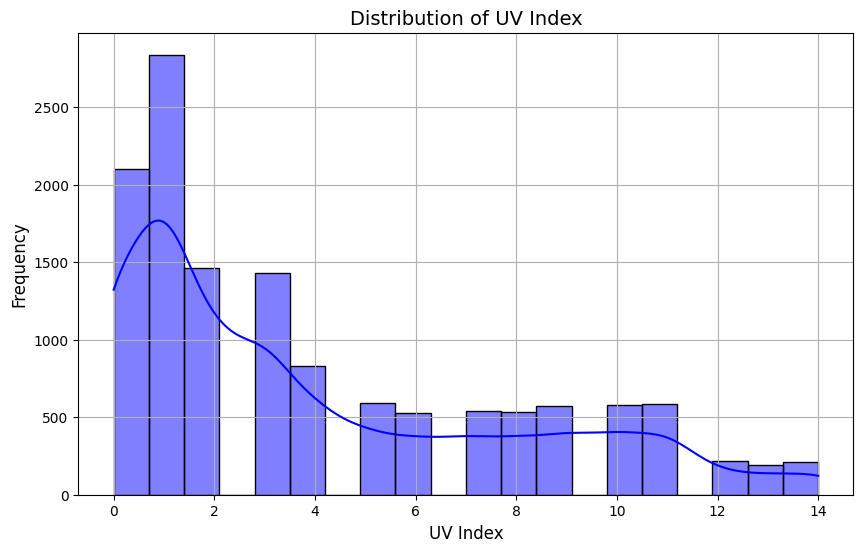

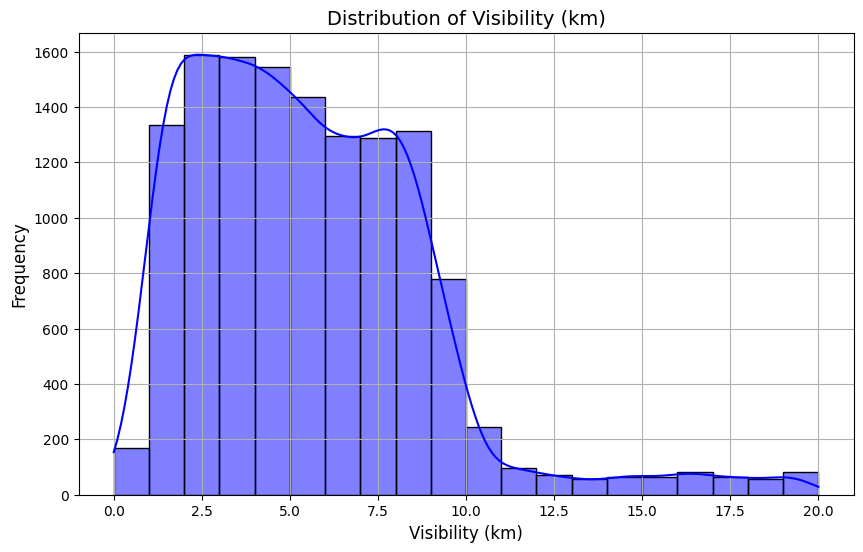

In [18]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))

    # Plot histogram
    sns.histplot(df[feature], kde=True, bins=20, color='blue')

    # Set title and labels
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)

    # Show the plot
    plt.show()

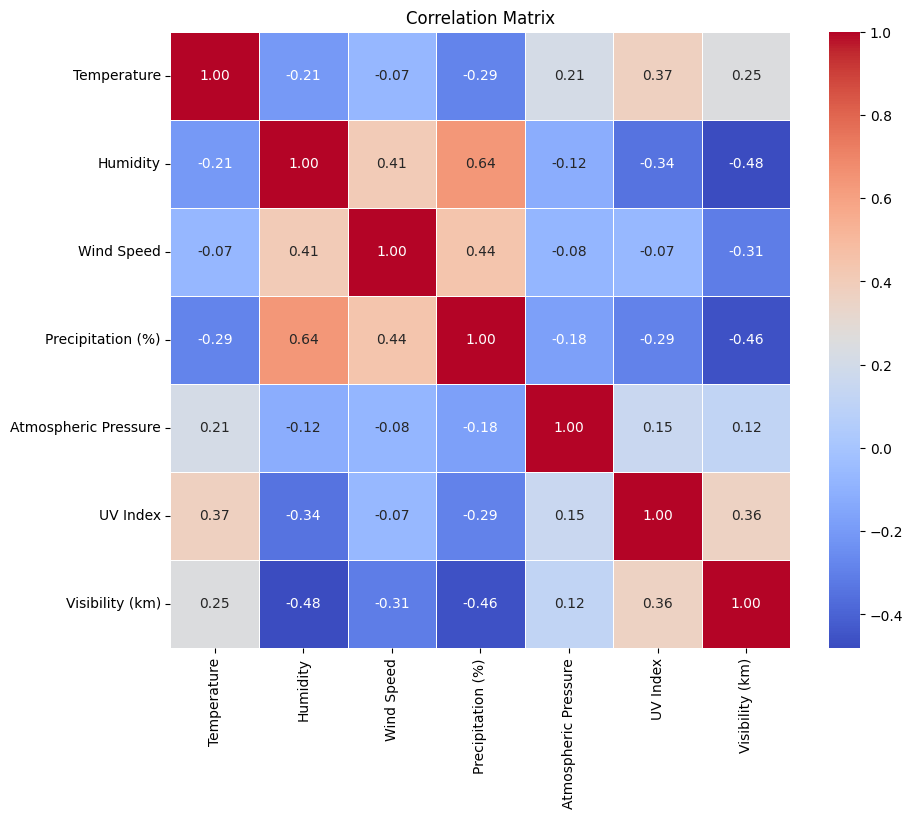

In [20]:
numerical_data = df[numerical_features]
correlation_matrix = numerical_data.corr()

# Plot the heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

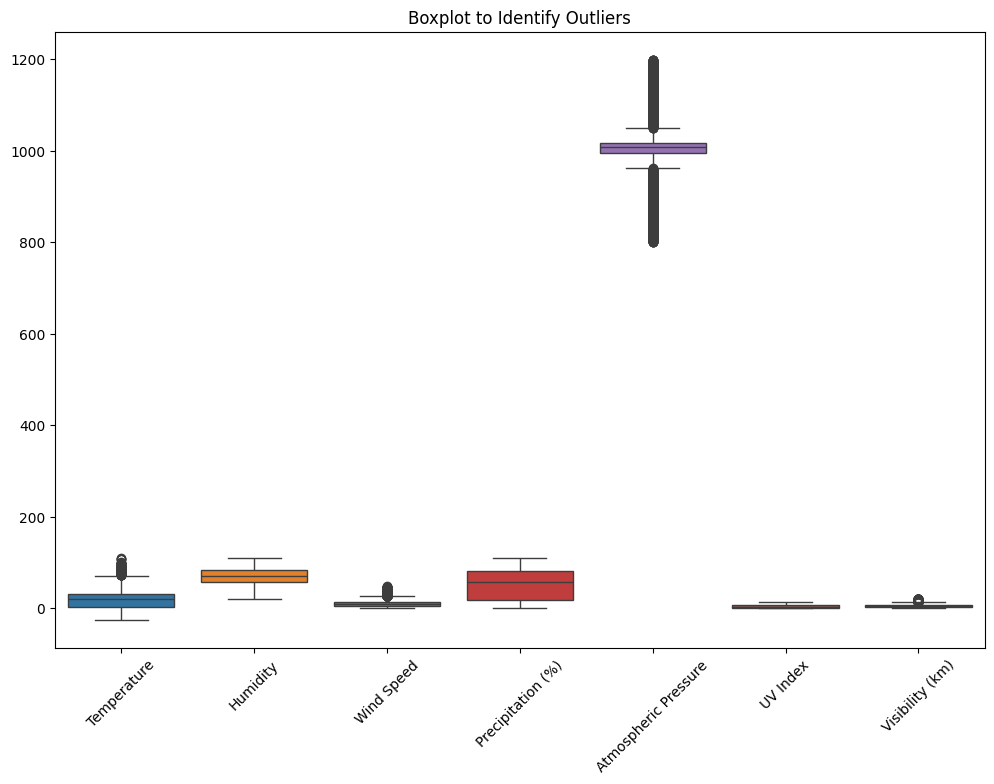

In [21]:

numerical_df = df[numerical_features]

# Plotting boxplot for each numerical feature to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=numerical_df)
plt.xticks(rotation=45)
plt.title('Boxplot to Identify Outliers')
plt.show()

In [23]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [30]:
categorical_features

['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [32]:
for feature in categorical_features:
    print(f"Value count in {feature}")
    print(df[feature].value_counts())

Value count in Cloud Cover
Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64
Value count in Season
Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64
Value count in Location
Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64
Value count in Weather Type
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [33]:
X = df.drop('Weather Type', axis=1)  # All columns except 'Weather Type'
y = df['Weather Type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


In [39]:
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))


In [40]:
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(X_train.select_dtypes(include=['object']).columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(X_test.select_dtypes(include=['object']).columns))

In [41]:
X_train_final = pd.concat([X_train.select_dtypes(exclude=['object']).reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.select_dtypes(exclude=['object']).reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

In [42]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [43]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_final, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [48]:
y_pred = model.predict(X_test_final)
y_train_pred = model.predict(X_train_final)

In [49]:
# 5. Evaluate the model performance
test_accuracy = accuracy_score(y_test_encoded, y_pred)
train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
print(f'Test Accuracy of the Decision Tree Model: {test_accuracy * 100:.2f}%')
print(f'Train Accuracy of the Decision Tree Model: {train_accuracy * 100:.2f}%')

Test Accuracy of the Decision Tree Model: 90.87%
Train Accuracy of the Decision Tree Model: 100.00%


Precision: 0.91
Recall: 0.91


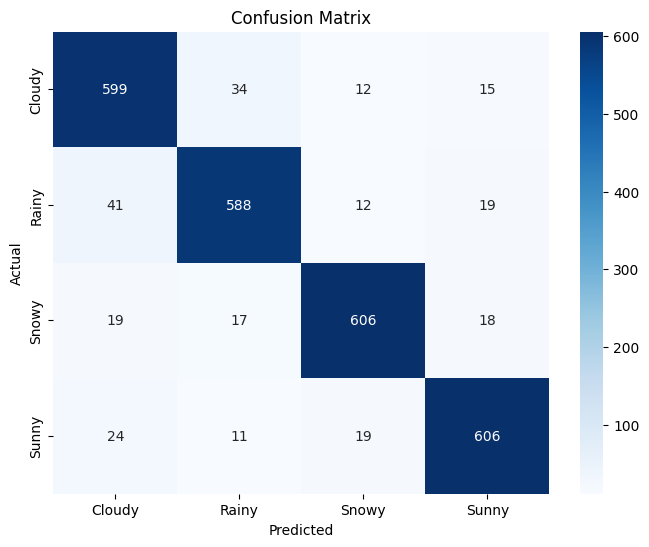


Classification Report:

              precision    recall  f1-score   support

      Cloudy       0.88      0.91      0.89       660
       Rainy       0.90      0.89      0.90       660
       Snowy       0.93      0.92      0.93       660
       Sunny       0.92      0.92      0.92       660

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [52]:
precision = precision_score(y_test_encoded, y_pred, average='weighted')  # Weighted for multi-class
recall = recall_score(y_test_encoded, y_pred, average='weighted')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# **3. Confusion Matrix**
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Convert labels back to original categories for plotting
class_labels = label_encoder.classes_

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **4. Classification Report (Detailed Metrics)**
print("\nClassification Report:\n")
print(classification_report(y_test_encoded, y_pred, target_names=class_labels))